In [25]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')
%matplotlib inline

In [26]:
df = pd.read_csv('../1 Original Data/housing.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [28]:
df.shape

(1460, 81)

In [29]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


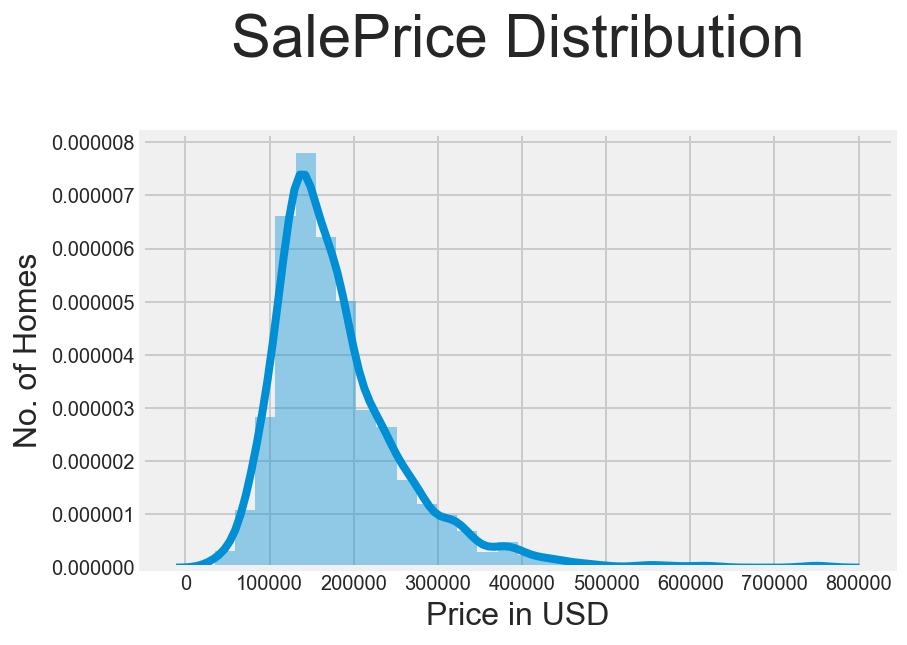

In [30]:
#Check out SalePrice distribution~
fig = plt.figure(figsize=(6,4))

ax = sns.distplot(df['SalePrice'], bins=30, kde=True)
ax.set_title('SalePrice Distribution\n', fontsize=30)
ax.set_ylabel('No. of Homes', fontsize=16)
ax.set_xlabel('Price in USD', fontsize=16)
plt.show()

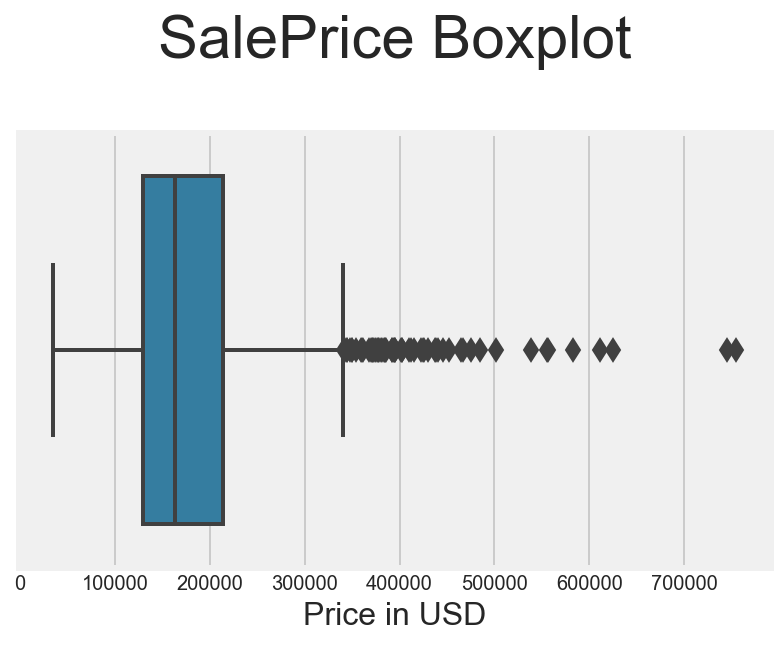

In [31]:
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

ax = sns.boxplot(df['SalePrice'], orient='h',
                fliersize=8, linewidth=2, notch=False,
                saturation=0.5, ax=ax)

ax.set_title('SalePrice Boxplot\n', fontsize=30)
ax.set_xlabel('Price in USD', fontsize=16)

plt.show()

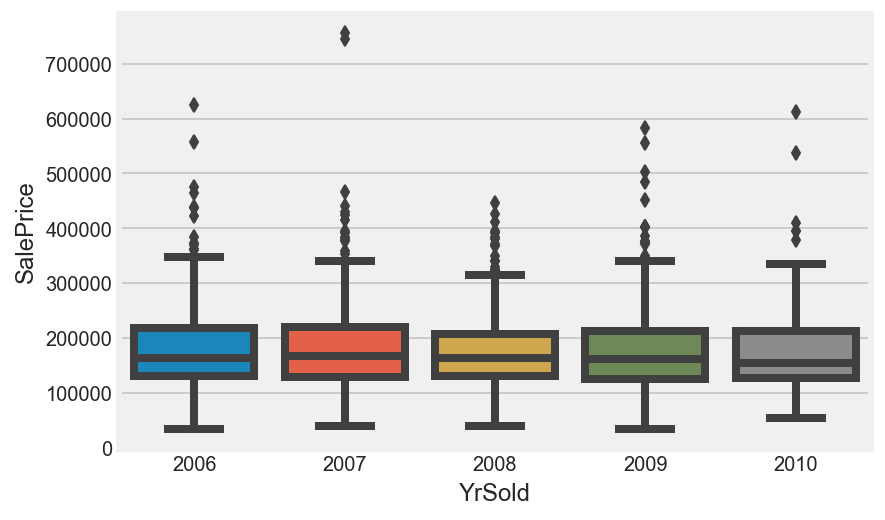

In [32]:
sns.boxplot(df['YrSold'],df['SalePrice'])

In [33]:
df[df['SalePrice']>700000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [34]:
df.drop(df[df['SalePrice']>700000].index,inplace=True)

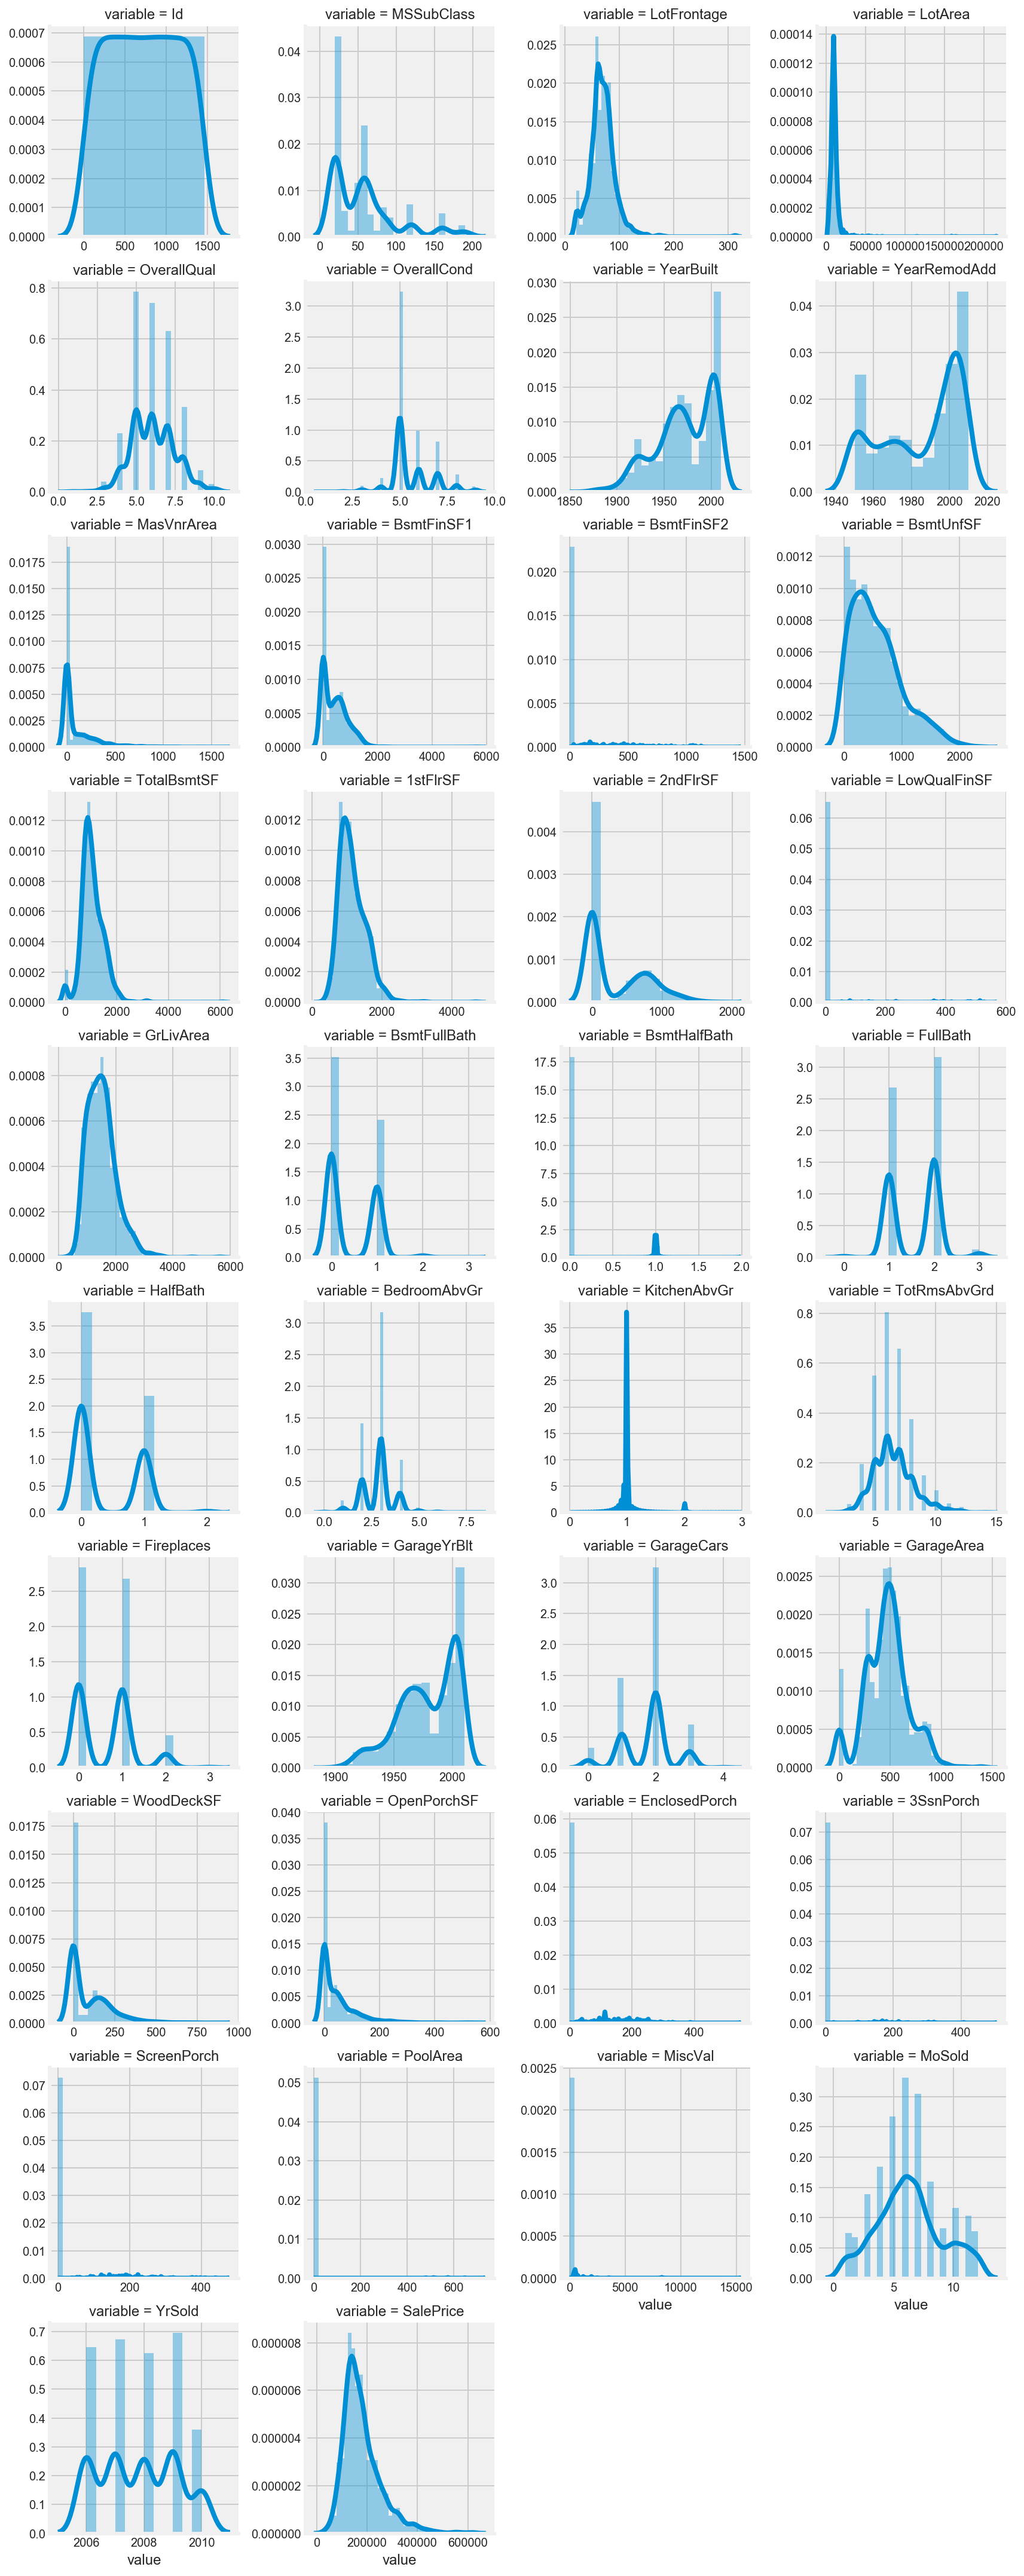

In [36]:
#Check out distribution for continuous features
df_cont = df.select_dtypes('number')
f = pd.melt(df_cont)
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

/Users/bokshenggan/anaconda/lib/python2.7/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


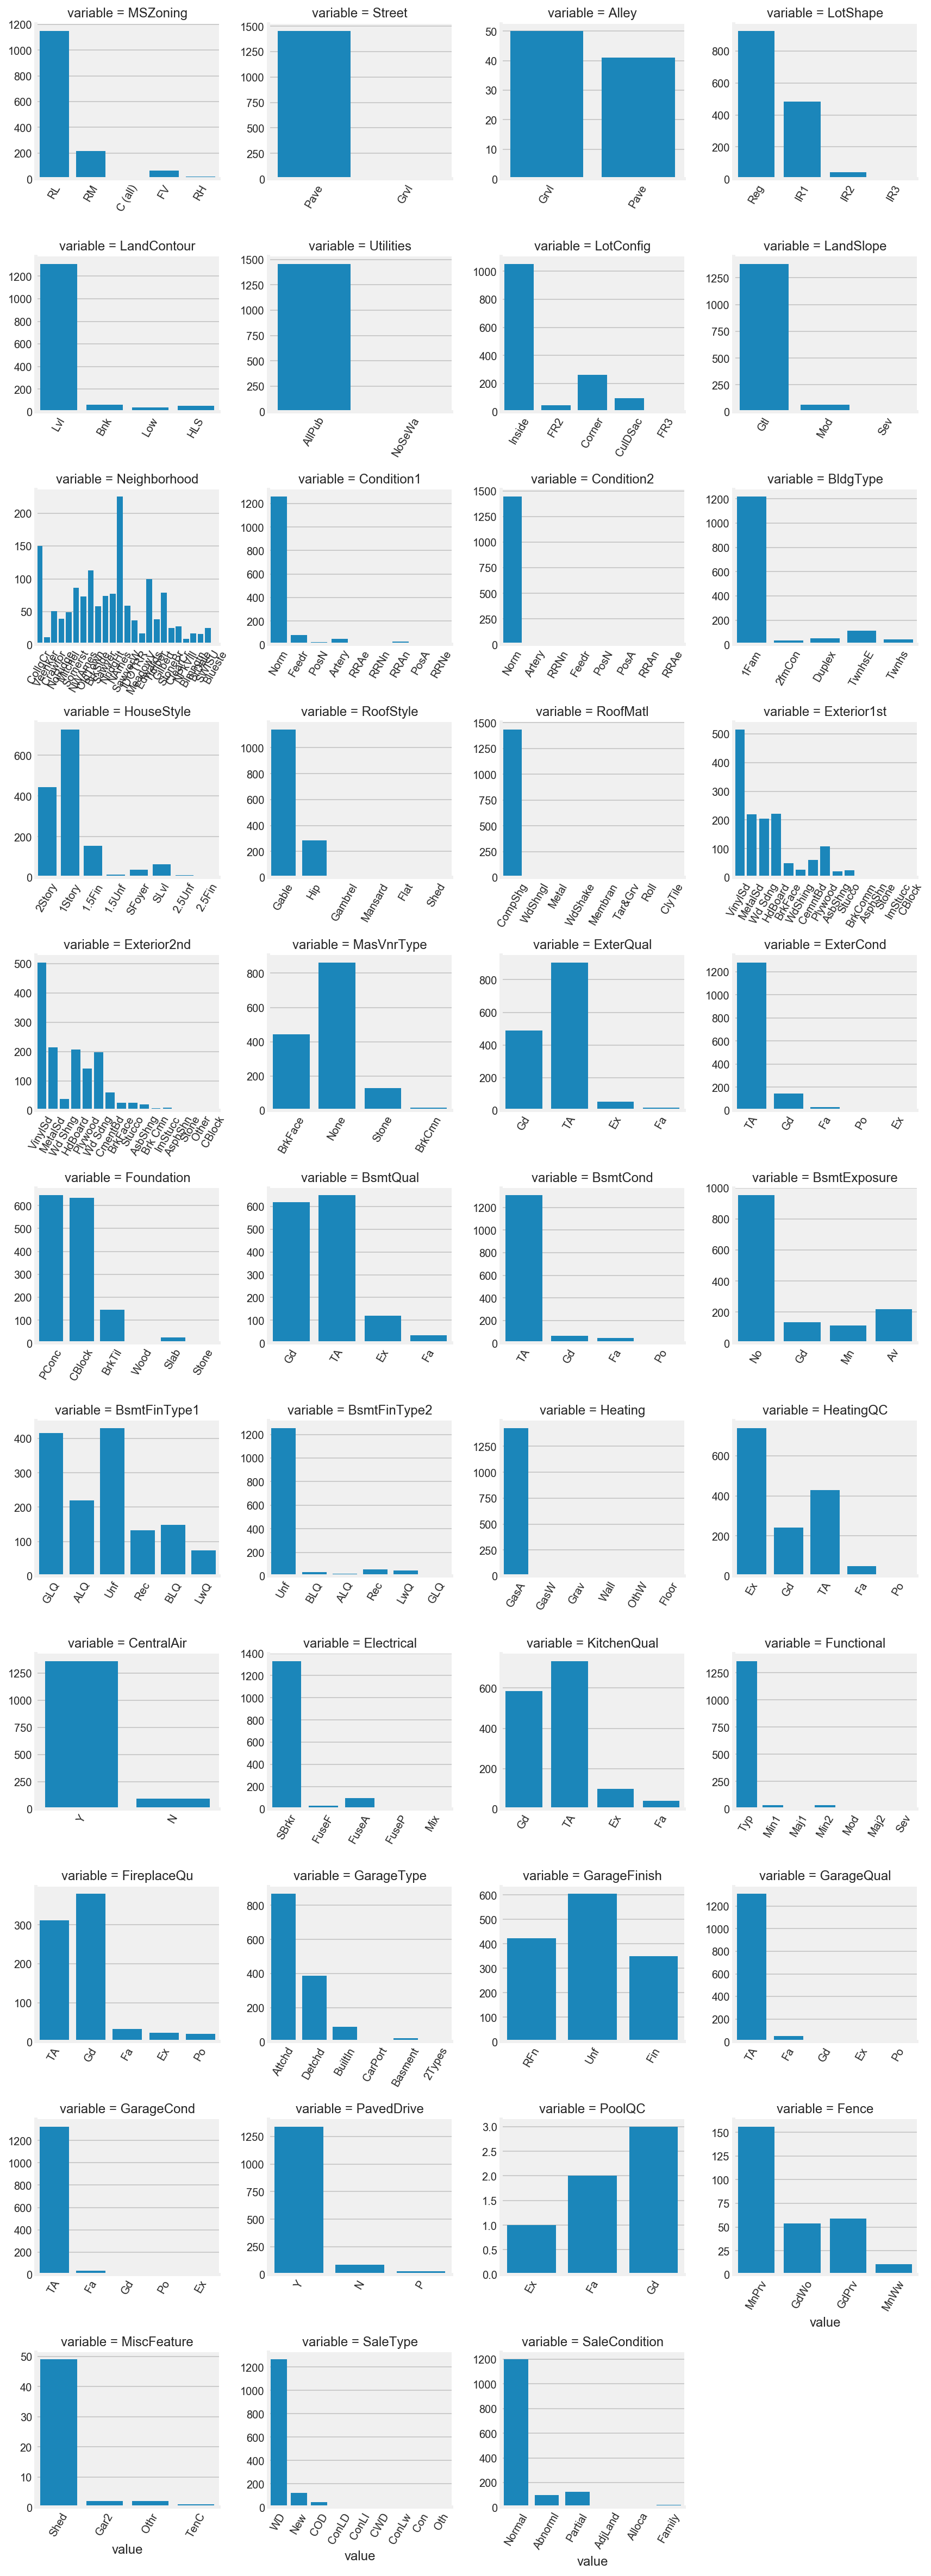

In [38]:
#Check out distribution for catogorical features#Check  
df_cat = df.select_dtypes('object')
f = pd.melt(df_cat)
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')

[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [39]:
# To check if there are any missing values

for i,e in enumerate(df.columns):
    if df[e].isnull().sum() >0:
        print ((df.columns[i]),(df[e].isnull().sum()))

('LotFrontage', 259)
('Alley', 1367)
('MasVnrType', 8)
('MasVnrArea', 8)
('BsmtQual', 37)
('BsmtCond', 37)
('BsmtExposure', 38)
('BsmtFinType1', 37)
('BsmtFinType2', 38)
('Electrical', 1)
('FireplaceQu', 690)
('GarageType', 81)
('GarageYrBlt', 81)
('GarageFinish', 81)
('GarageQual', 81)
('GarageCond', 81)
('PoolQC', 1452)
('Fence', 1178)
('MiscFeature', 1404)


### Handling missing features -> Drop
Alley, PoolQC, PoolArea, Fence, MiscFeature, MiscVal

### Handling unnecessary features -> Drop
Id

In [40]:
# Alley, PoolQC, Fence and MiscFeature has too many missing values
df.drop('Alley', axis=1, inplace=True)
df.drop('PoolQC', axis=1, inplace=True)
df.drop('PoolArea', axis=1, inplace=True)
df.drop('Fence', axis=1, inplace=True)
df.drop('MiscFeature', axis=1, inplace=True)
df.drop('MiscVal', axis=1, inplace=True)
df.drop('GarageYrBlt', axis=1, inplace=True) # Assume same year as Building being built

# We don't need Id
df.drop('Id', axis=1, inplace=True)

### Handling missing features -> Impute
LotFrontage, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2,
Electrical, FireplaceQu, 
GarageType, GarageFinish, GarageQual, GarageCond, GarageYrBlt

In [41]:
# Feature Imputing 

df.loc[df.LotFrontage.isnull(), 'LotFrontage'] = df.LotFrontage.median()

df.loc[df.MasVnrType.isnull(), 'MasVnrType'] = 'None'
df.loc[df.MasVnrType == 'None', 'MasVnrArea'] = 0

df.loc[df.BsmtQual.isnull(), 'BsmtQual'] = 'NoBsmt'
df.loc[df.BsmtCond.isnull(), 'BsmtCond'] = 'NoBsmt'
df.loc[df.BsmtExposure.isnull(), 'BsmtExposure'] = 'NoBsmt'
df.loc[df.BsmtFinType1.isnull(), 'BsmtFinType1'] = 'NoBsmt'
df.loc[df.BsmtFinType2.isnull(), 'BsmtFinType2'] = 'NoBsmt'
df.loc[df.BsmtQual=='NoBsmt', 'BsmtUnfSF'] = 0
df.loc[df.BsmtQual=='NoBsmt', 'TotalBsmtSF'] = 0

df.drop(df[df['Electrical'].isnull()].index,inplace=True)
df.loc[df.FireplaceQu.isnull(), 'FireplaceQu'] = 'NoFireplace'

df.loc[df.GarageType.isnull(), 'GarageType'] = 'NoGarage'
df.loc[df.GarageFinish.isnull(), 'GarageFinish'] = 'NoGarage'
df.loc[df.GarageQual.isnull(), 'GarageQual'] = 'NoGarage'
df.loc[df.GarageCond.isnull(), 'GarageCond'] = 'NoGarage'

In [42]:
# Drop Non-residential rows
df.drop(df[df['MSZoning'] == 'C (all)'].index,inplace=True)

# Feature Engineering

1. House Age (YrSold - YearBuilt)
2. Renovated (Yes-1/ No-0)
3. TotalBath = FullBath + BsmtFullBath + .5(HalfBath + BsmtHalfBath)

In [44]:
# Creating House Age
df['Age'] = df['YrSold'] - df['YearBuilt']

# Creating Renovated
df['Renovated'] = df['YearRemodAdd'] - df['YearBuilt']
df['Renovated']= df['Renovated'].apply(lambda x: 1 if x>0 else 0)

In [45]:
df[['YearBuilt','YearRemodAdd','Renovated','YrSold','Age',]].head()

,YearBuilt,YearRemodAdd,Renovated,YrSold,Age
0,2003,2003,0,2008,5
1,1976,1976,0,2007,31
2,2001,2002,1,2008,7
3,1915,1970,1,2006,91
4,2000,2000,0,2008,8


In [46]:
df.drop('YearRemodAdd',axis=1,inplace=True)

In [47]:
df['TotalBath'] = df['FullBath'] + df['BsmtFullBath'] + 0.5*(df['HalfBath'] + df['BsmtHalfBath'])

In [48]:
df.drop('FullBath', axis=1, inplace=True)
df.drop('BsmtFullBath', axis=1, inplace=True)
df.drop('HalfBath', axis=1, inplace=True)
df.drop('BsmtHalfBath', axis=1, inplace=True)

### Fixed
**Continous Features**
LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotalBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,YearBuilt,
Age,YrSold,

**Ordinal Features**
ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,OverallQual,OverallCond,

**Categorical Features**
MSSubClass, MSZoning, Street,LotShape,LandContour, Utilities, LotConfig, LandSlope,Neighborhood,BldgType,HouseStyle,
MasVnrType,Foundation,CentralAir,Functional, GarageType,PavedDrive,

Exterior1st,Exterior2nd,Condition1,Condition2,

### Renovable

**Ordinal Features**
BsmtFinType1,BsmtFinType2,FireplaceQu,KitchenQual,GarageFinish,HeatingQC,GarageQual,GarageCond,

**Categorical Features**
Renovated',RoofStyle', RoofMatl',MoSold',SaleType,Electrical',Heating',

### Target
SalePrice, SaleCondition

## Handling unscaled ordinal categories

ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, FireplaceQu, GarageFinish, GarageQual, GarageCond,

In [49]:
# ExterQual
scale_mapper = {'Ex':5, 
                'Gd':4,
                'TA':3,
                'Fa':2,
                'Po':1}

# Map feature values to scale
df['ExterQual'].replace(scale_mapper, inplace=True)

# ExterCond
scale_mapper = {'Ex':5, 
                'Gd':4,
                'TA':3,
                'Fa':2,
                'Po':1}

# Map feature values to scale
df['ExterCond'].replace(scale_mapper, inplace=True)

# BsmtQual
scale_mapper = {'Ex':5, 
                'Gd':4,
                'TA':3,
                'Fa':2,
                'Po':1,
                'NoBsmt':0}

# Map feature values to scale
df['BsmtQual'].replace(scale_mapper, inplace=True)

# BsmtCond
scale_mapper = {'Ex':5, 
                'Gd':4,
                'TA':3,
                'Fa':2,
                'Po':1,
                'NoBsmt':0}

# Map feature values to scale
df['BsmtCond'].replace(scale_mapper, inplace=True)

# BsmtExposure
scale_mapper = {'Gd':3,
                'Av':2,
                'Mn':1,
                'No':0,
                'NoBsmt':0}

# Map feature values to scale
df['BsmtExposure'].replace(scale_mapper, inplace=True)

# BsmtFinType1
scale_mapper = {'GLQ':6,
                'ALQ':5,
                'BLQ':4,
                'Rec':3,
                'LwQ':2,
                'Unf':1,
                'NoBsmt':0}

# Map feature values to scale
df['BsmtFinType1'].replace(scale_mapper, inplace=True)

# BsmtFinType2
scale_mapper = {'GLQ':6,
                'ALQ':5,
                'BLQ':4,
                'Rec':3,
                'LwQ':2,
                'Unf':1,
                'NoBsmt':0}

# Map feature values to scale
df['BsmtFinType2'].replace(scale_mapper, inplace=True)

# HeatingQC
scale_mapper = {'Ex':5, 
                'Gd':4,
                'TA':3,
                'Fa':2,
                'Po':1,
                'NoBsmt':0}

# Map feature values to scale
df['HeatingQC'].replace(scale_mapper, inplace=True)

# KitchenQual
scale_mapper = {'Ex':5, 
                'Gd':4,
                'TA':3,
                'Fa':2,
                'Po':1,
                'NoBsmt':0}

# Map feature values to scale
df['KitchenQual'].replace(scale_mapper, inplace=True)

#  FireplaceQu
scale_mapper = {'Ex':5, 
                'Gd':4,
                'TA':3,
                'Fa':2,
                'Po':1,
                'NoFireplace':0}

# Map feature values to scale
df['FireplaceQu'].replace(scale_mapper, inplace=True)

#  GarageFinish
scale_mapper = {'Fin':3,
                'RFn':2,
                'Unf':1,
                'NA':0,
                'NoGarage':0}

# Map feature values to scale
df['GarageFinish'].replace(scale_mapper, inplace=True)

#  GarageQual
scale_mapper = {'Ex':5, 
                'Gd':4,
                'TA':3,
                'Fa':2,
                'Po':1,
                'NoGarage':0}

# Map feature values to scale
df['GarageQual'].replace(scale_mapper, inplace=True)

#  GarageCond
scale_mapper = {'Ex':5, 
                'Gd':4,
                'TA':3,
                'Fa':2,
                'Po':1,
                'NoGarage':0}

# Map feature values to scale
df['GarageCond'].replace(scale_mapper, inplace=True)

#  Functional
scale_mapper = {'Typ':7, 
                'Min1':6,
                'Min2':5,
                'Mod':4,
                'Maj1':3,
                'Maj2':2,
                'Sev':1,
                'Sal':0}

# Map feature values to scale
df['Functional'].replace(scale_mapper, inplace=True)

In [50]:
for i in list(df['Exterior1st'].unique()):
    if i not in list(df['Exterior2nd'].unique()):
        print i

WdShing
CemntBd
BrkComm


In [51]:
for i in list(df['Exterior2nd'].unique()):
    if i not in list(df['Exterior1st'].unique()):
                     print i

Wd Shng
CmentBd
Brk Cmn
Other


In [52]:
# Changing Values in Exterior2nd to match
df['Exterior2nd'] = df['Exterior2nd'].apply(lambda x: 'WdShing' if x == 'Wd Shng' else x)
df['Exterior2nd'] = df['Exterior2nd'].apply(lambda x: 'CemntBd' if x == 'CmentBd' else x)
df['Exterior2nd'] = df['Exterior2nd'].apply(lambda x: 'BrkComm' if x == 'Brk Cmn' else x)

In [53]:
# Capturing list of values 
exterior = []

for i in list(df['Exterior2nd'].unique()):
    exterior.append(i)

In [54]:
df['Exterior1st'] = df['Exterior1st'].apply(lambda x: 'Other' if x == 'Other' else x+str(1))
df['Exterior2nd'] = df['Exterior2nd'].apply(lambda x: 'Other' if x == 'Other' else x+str(2))

In [55]:
dummy = pd.get_dummies(df['Exterior1st'])
df = pd.concat([df, dummy], axis=1)
df.drop('Exterior1st', axis=1, inplace=True)

dummy = pd.get_dummies(df['Exterior2nd'])
df = pd.concat([df, dummy], axis=1)
df.drop('Exterior2nd', axis=1, inplace=True)

In [56]:
# Creating 3rd Set of Columns
for i in ['VinylSd', 'MetalSd', 'WdShing', 'HdBoard',
          'Plywood', 'Wd Sdng', 'CemntBd', 'BrkFace',
          'Stucco', 'AsbShng', 'BrkComm', 'ImStucc',
          'AsphShn', 'Stone', 'CBlock']:
    df[i] = df[i+str(1)]+df[i+str(2)]
    df.drop(i+str(1), axis=1, inplace=True)
    df.drop(i+str(2), axis=1, inplace=True)

# Aggregating final set
for i in ['VinylSd','MetalSd', 'WdShing', 'HdBoard',
          'Plywood', 'Wd Sdng', 'CemntBd', 'BrkFace',
          'Stucco', 'AsbShng', 'BrkComm', 'ImStucc',
          'AsphShn', 'Stone', 'CBlock','Other']:
    df[i] = df[i].apply(lambda x: 1 if x>0 else x)

In [57]:
df[['VinylSd','MetalSd', 'WdShing', 'HdBoard',
          'Plywood', 'Wd Sdng', 'CemntBd', 'BrkFace',
          'Stucco', 'AsbShng', 'BrkComm', 'ImStucc',
          'AsphShn', 'Stone', 'CBlock','Other']].head()

,VinylSd,MetalSd,WdShing,HdBoard,Plywood,Wd Sdng,CemntBd,BrkFace,Stucco,AsbShng,BrkComm,ImStucc,AsphShn,Stone,CBlock,Other
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
# Drop one dummy variable
df.drop('VinylSd', axis=1, inplace=True)

In [59]:
for i in list(df['Condition1'].unique()):
    if i not in list(df['Condition2'].unique()):
                     print i

RRNe


In [60]:
for i in list(df['Condition2'].unique()):
    if i not in list(df['Condition1'].unique()):
                     print i

In [61]:
condition = []

for i in list(df['Condition1'].unique()):
    condition.append(i)

In [62]:
df['Condition1'] = df['Condition1'].apply(lambda x: 'RRNe' if x == 'RRNe' else x+str(1))
df['Condition2'] = df['Condition2'].apply(lambda x: 'RRNe' if x == 'RRNe' else x+str(2))

In [63]:
dummy = pd.get_dummies(df['Condition1'])
df = pd.concat([df, dummy], axis=1)
df.drop('Condition1', axis=1, inplace=True)

dummy = pd.get_dummies(df['Condition2'])
df = pd.concat([df, dummy], axis=1)
df.drop('Condition2', axis=1, inplace=True)

In [64]:
# Creating 3rd Set of Columns
for i in ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA']:
    df[i] = df[i+str(1)]+df[i+str(2)]
    df.drop(i+str(1), axis=1, inplace=True)
    df.drop(i+str(2), axis=1, inplace=True)

# Aggregating final set
for i in ['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']:
    df[i] = df[i].apply(lambda x: 1 if x>0 else x)

In [65]:
df[['Norm','Feedr','PosN','Artery','RRAe','RRNn','RRAn','PosA','RRNe']].head()

,Norm,Feedr,PosN,Artery,RRAe,RRNn,RRAn,PosA,RRNe
0,1,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


In [66]:
# Drop one dummy variable
df.drop('Norm',axis=1, inplace=True)

### Handling Categorical Features - Non- Recurring

In [67]:
# Central Air
df['CentralAir'] = df['CentralAir'].apply(lambda x: 1 if x == 'Y' else 0)

# Converting MSSubClass data type to string
df['MSSubClass'] = df['MSSubClass'].apply(lambda x: 'Class'+str(x))

# MoSold
df['MoSold'] = df['MoSold'].apply(lambda x:'mon'+str(x))

In [68]:
# To drop off renovable features
df1 = df.copy()

In [69]:
df1.drop(['BsmtFinType1','BsmtFinType2','FireplaceQu','KitchenQual','GarageFinish','GarageQual','GarageCond','HeatingQC',
          'RoofStyle','RoofMatl','MoSold','SaleType','SaleCondition',
          'Renovated','Electrical','Heating'], axis=1, inplace=True)

In [70]:
# Categorical Features for part 1 Exclude YearSold, CentralAir
Cat = ['MSSubClass','MSZoning','Street','LotShape','LandContour',
       'Utilities','LotConfig','LandSlope','Neighborhood','BldgType',
       'HouseStyle','MasVnrType','Foundation','GarageType','PavedDrive',]

for i in Cat:
    dummy = pd.get_dummies(df1[i],drop_first=True)
    df1 = pd.concat([df1, dummy], axis=1)
    df1.drop(i, axis=1, inplace=True)

In [71]:
df1.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,Stone,Wood,Attchd,Basment,BuiltIn,CarPort,Detchd,NoGarage,P,Y
0,65.0,8450,7,5,2003,196.0,4,3,4,3,...,0,0,1,0,0,0,0,0,0,1
1,80.0,9600,6,8,1976,0.0,3,3,4,3,...,0,0,1,0,0,0,0,0,0,1
2,68.0,11250,7,5,2001,162.0,4,3,4,3,...,0,0,1,0,0,0,0,0,0,1
3,60.0,9550,7,5,1915,0.0,3,3,3,4,...,0,0,0,0,0,0,1,0,0,1
4,84.0,14260,8,5,2000,350.0,4,3,4,3,...,0,0,1,0,0,0,0,0,0,1


In [73]:
df1.to_pickle('../3 Modelling/df1.pkl')